In [1]:
'''
Author: 柳皓宇
Number: 202320000391
'''

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
image = cv2.imread("image\image.jpg", cv2.IMREAD_GRAYSCALE)
color_image = cv2.imread("image\image.jpg")
color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

print(image)
print(color_image)

[[83 83 83 ... 89 90 90]
 [87 86 87 ... 93 94 94]
 [91 90 90 ... 98 98 99]
 ...
 [46 43 40 ... 36 28 26]
 [46 43 40 ... 37 27 25]
 [45 42 39 ... 37 31 28]]
[[[ 79  83  92]
  [ 79  84  90]
  [ 79  84  90]
  ...
  [113  84  50]
  [115  85  51]
  [115  85  49]]

 [[ 83  87  96]
  [ 82  86  95]
  [ 83  88  94]
  ...
  [118  88  54]
  [119  89  55]
  [119  89  53]]

 [[ 87  91 100]
  [ 86  90  99]
  [ 86  90  99]
  ...
  [123  93  59]
  [123  93  59]
  [124  94  58]]

 ...

 [[ 45  45  55]
  [ 42  42  52]
  [ 39  39  49]
  ...
  [ 43  32  38]
  [ 36  24  28]
  [ 34  22  24]]

 [[ 45  45  55]
  [ 42  42  52]
  [ 39  39  51]
  ...
  [ 43  34  39]
  [ 34  24  25]
  [ 33  21  23]]

 [[ 44  44  54]
  [ 41  41  53]
  [ 38  38  50]
  ...
  [ 43  34  39]
  [ 38  28  29]
  [ 35  25  26]]]


In [3]:
def GaussKernel(size, sigma):
    """生成一个高斯核。

    参数:
    size : int
        高斯核的大小，它是一个 n x n 的矩阵，n 为奇数。
    sigma : float
        高斯核的标准差。

    返回:
    kernel : ndarray
        生成的高斯核。
    """
    
    # 确保 size 是奇数
    assert size % 2 == 1, "Size should be an odd number."
    
    # 初始化高斯核
    kernel = np.zeros((size, size), dtype=np.float32)
    
    # 计算中心点
    center = size // 2
    
    # 填充高斯核
    for i in range(size):
        for j in range(size):
            diff = np.square(i - center) + np.square(j - center)
            kernel[i, j] = np.exp(-diff / (2. * sigma * sigma))
    
    # 归一化高斯核
    kernel /= 2 * np.pi * sigma * sigma
    kernel /= kernel.sum()
    
    return kernel

print(GaussKernel(3, 1.5))

[[0.09474166 0.11831801 0.09474166]
 [0.11831801 0.14776132 0.11831801]
 [0.09474166 0.11831801 0.09474166]]


In [4]:
def GaussFilter(image, kernel):
    """自动应用高斯滤波到灰度或彩色图像上。

    参数:
    image : ndarray
        输入的灰度或彩色图像。
    kernel : ndarray
        高斯核。

    返回:
    result : ndarray
        高斯滤波后的灰度或彩色图像。
    """
    # 检查图像是灰度还是彩色
    if len(image.shape) == 2:
        # 灰度图像
        image = image[:, :, np.newaxis]  # 添加一个通道维度以统一处理流程
        num_channels = 1
    elif len(image.shape) == 3:
        # 彩色图像
        num_channels = image.shape[2]
    else:
        raise ValueError("Unsupported image format.")
    
    # 初始化输出图像
    image_height, image_width = image.shape[:2]
    result = np.zeros((image_height, image_width, num_channels), dtype=image.dtype)
    
    # 对每个通道应用高斯滤波
    for c in range(num_channels):
        # 对图像进行边缘填充
        padded_image = np.pad(image[:, :, c], kernel.shape[0] // 2, mode='constant')
        
        for i in range(image_height):
            for j in range(image_width):
                # 提取当前处理的图像区域
                region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
                # 应用核函数
                result[i, j, c] = np.sum(region * kernel)
    
    # 如果输入是灰度图，去除通道维度
    if num_channels == 1:
        result = result[:, :, 0]
    
    return result


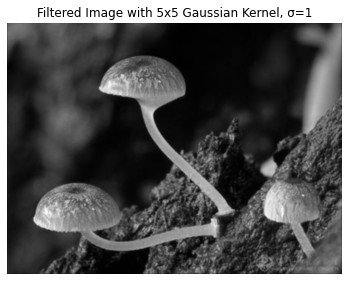

In [5]:
# 生成高斯核
kernel = GaussKernel(5, 1)

# 应用高斯滤波
filtered_image = GaussFilter(image, kernel)

# 显示滤波后的图像
plt.figure(figsize=(6, 6))
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with 5x5 Gaussian Kernel, σ=1')
plt.axis('off')
plt.show()

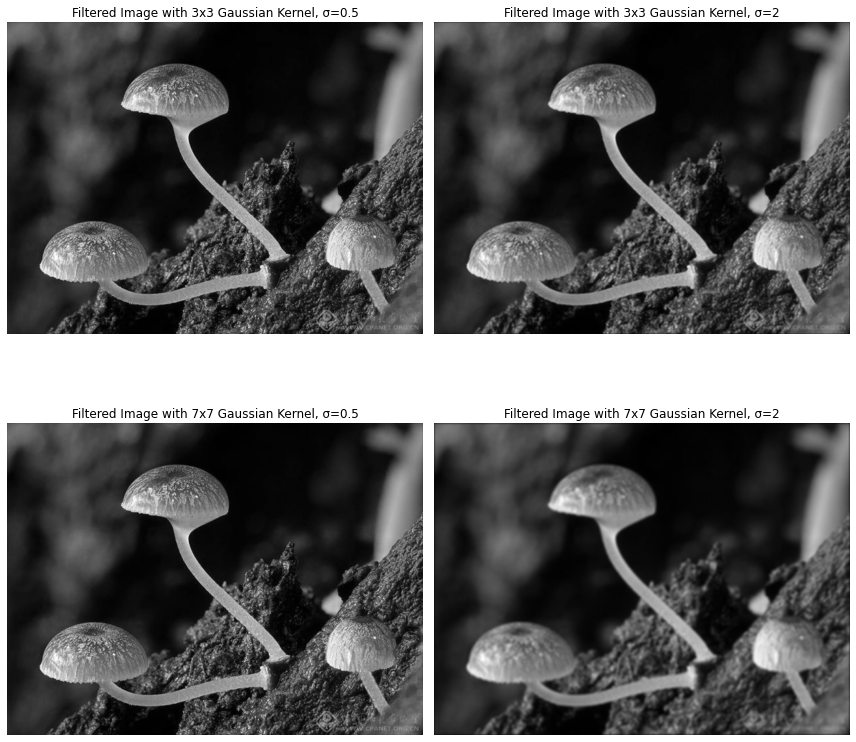

In [6]:
# 定义不同的核大小和标准差
params = [(3, 0.5), (3, 2), (7, 0.5), (7, 2)]

# 创建一个画布
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# 应用不同的高斯核进行滤波并展示结果
for (size, sigma), ax in zip(params, axes.flatten()):
    # 生成高斯核
    kernel = GaussKernel(size, sigma)
    
    # 应用高斯滤波
    filtered_image = GaussFilter(image, kernel)
    
    # 展示结果
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(f'Filtered Image with {size}x{size} Gaussian Kernel, σ={sigma}')
    ax.axis('off')

plt.tight_layout()
plt.show()

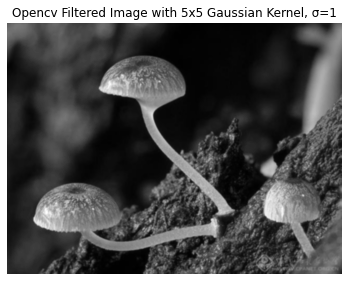

In [7]:
opencv_filtered_image = cv2.GaussianBlur(image, (5, 5), 1)

# 显示滤波后的图像
plt.figure(figsize=(6, 6))
plt.imshow(opencv_filtered_image, cmap='gray')
plt.title('Opencv Filtered Image with 5x5 Gaussian Kernel, σ=1')
plt.axis('off')
plt.show()

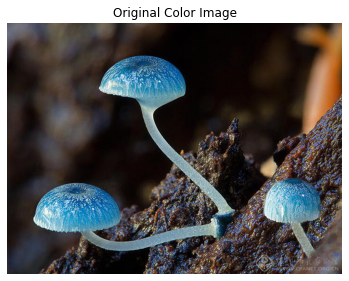

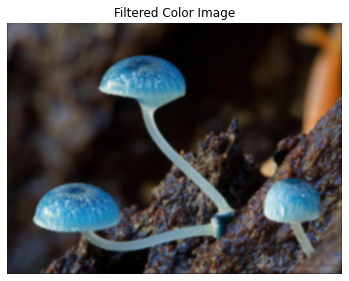

In [8]:
# 使用彩色图像
filtered_color_image = GaussFilter(color_image, kernel)

# 显示滤波前后的图像
plt.figure(figsize=(6, 6))
plt.imshow(color_image)
plt.title('Original Color Image')
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(filtered_color_image)
plt.title('Filtered Color Image')
plt.axis('off')
plt.show()